In [19]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import jieba
import numpy as np
from sklearn.impute import SimpleImputer
import pandas as pd

In [7]:
# 1 DictVectorizer示例：将字典列表转换为特征矩阵

data = [
    {'城市': '北京', '温度': 100, '湿度': 60, '风力': '强'},
    {'城市': '上海', '温度': 90, '湿度': 70, '风力': '中'},
    {'城市': '深圳', '温度': 110, '湿度': 80, '风力': '弱'}
]
dict_vectorizer = DictVectorizer(sparse=False) # sparse=False表示返回稠密矩阵
X = dict_vectorizer.fit_transform(data)
print(X)
X_name = dict_vectorizer.get_feature_names_out()
print(X_name)
origin_data =dict_vectorizer.inverse_transform(X)

for item in origin_data:
    print(item)

[[  0.   1.   0. 100.  60.   0.   0.   1.]
 [  1.   0.   0.  90.  70.   1.   0.   0.]
 [  0.   0.   1. 110.  80.   0.   1.   0.]]
['城市=上海' '城市=北京' '城市=深圳' '温度' '湿度' '风力=中' '风力=弱' '风力=强']
{'城市=北京': 1.0, '温度': 100.0, '湿度': 60.0, '风力=强': 1.0}
{'城市=上海': 1.0, '温度': 90.0, '湿度': 70.0, '风力=中': 1.0}
{'城市=深圳': 1.0, '温度': 110.0, '湿度': 80.0, '风力=弱': 1.0}


In [8]:
#CountVectorizer英文示例：将英文文本转换为词频矩阵
# 创建一些示例文本
corpus = [
    'I love machine learning and data science',
    'This is a great course about machine learning',
    'Data science is interesting and fun',
    'Python is essential for data science'
]

# 创建CountVectorizer对象
vectorizer = CountVectorizer()

# 将文本转换为词频矩阵
X = vectorizer.fit_transform(corpus)

# 获取特征名称（词汇表）
feature_names = vectorizer.get_feature_names_out()

# 将词频矩阵转换为数组并打印结果
print("词汇表:")
print(feature_names)
print("\n词频矩阵:")
print(X.toarray())

# 输出每个文档的词频统计
for i, doc in enumerate(corpus):
    print(f"\n文档 {i+1} 的词频:")
    for j, word in enumerate(feature_names):
        if X.toarray()[i][j] > 0:
            print(f"{word}: {X.toarray()[i][j]}")


词汇表:
['about' 'and' 'course' 'data' 'essential' 'for' 'fun' 'great'
 'interesting' 'is' 'learning' 'love' 'machine' 'python' 'science' 'this']

词频矩阵:
[[0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0]
 [1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1]
 [0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0]
 [0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0]]

文档 1 的词频:
and: 1
data: 1
learning: 1
love: 1
machine: 1
science: 1

文档 2 的词频:
about: 1
course: 1
great: 1
is: 1
learning: 1
machine: 1
this: 1

文档 3 的词频:
and: 1
data: 1
fun: 1
interesting: 1
is: 1
science: 1

文档 4 的词频:
data: 1
essential: 1
for: 1
is: 1
python: 1
science: 1


In [17]:
# 原始文本数据
raw_text = [
    "我喜欢吃北京烤鸭",
    "我喜欢吃上海小笼包",
    "北京烤鸭真好吃",
]

# 使用jieba进行分词，并用空格连接
text_data = [' '.join(jieba.cut(text)) for text in raw_text]
print('-'*50)
print(list(jieba.cut(raw_text[0])))
print('-'*50)
# 创建CountVectorizer对象
vectorizer = CountVectorizer()

# 对文本数据进行向量化
X = vectorizer.fit_transform(text_data)

# 获取特征名称（词汇表）
feature_names = vectorizer.get_feature_names_out()
print("词汇表：", feature_names)

# 将向量化结果转换为数组并打印
print("\n文本向量化结果：")
print(X.toarray())

# 解释结果
print("\n解释：")
print("- 每行代表一个文档")
print("- 每列代表词汇表中的一个词")
print("- 数值表示每个词在对应文档中出现的次数")


--------------------------------------------------
['我', '喜欢', '吃', '北京烤鸭']
--------------------------------------------------
词汇表： ['上海' '北京烤鸭' '喜欢' '好吃' '小笼包']

文本向量化结果：
[[0 1 1 0 0]
 [1 0 1 0 1]
 [0 1 0 1 0]]

解释：
- 每行代表一个文档
- 每列代表词汇表中的一个词
- 数值表示每个词在对应文档中出现的次数


In [20]:
#TF-IDF
# 示例文档集合
documents = [
    "我 喜欢 吃 苹果",  # 文档1
    "苹果 手机 很 好用",  # 文档2 
    "我 喜欢 吃 香蕉",  # 文档3
]

# 创建TF-IDF向量化器
tfidf_vectorizer = TfidfVectorizer()

# 将文档转换为TF-IDF特征矩阵
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# 获取特征词列表
feature_names = tfidf_vectorizer.get_feature_names_out()

# 将TF-IDF矩阵转换为DataFrame以便查看
df_tfidf = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=feature_names
)

print("TF-IDF特征矩阵:")
print(df_tfidf)

# 解释某个词的TF-IDF值
print("\n'苹果'这个词在不同文档中的TF-IDF值:")
print(df_tfidf['苹果'])

'''
说明:
1. TF(词频): 一个词在文档中出现的次数/文档总词数
2. IDF(逆文档频率): log(总文档数/包含该词的文档数)
3. TF-IDF = TF * IDF

- '苹果'在文档1和文档2中都出现了一次,但因为它在多个文档中出现,所以IDF值较低
- '香蕉'只在文档3中出现一次,因为它比较独特,所以IDF值较高
'''


TF-IDF特征矩阵:
         喜欢        好用        手机        苹果        香蕉
0  0.707107  0.000000  0.000000  0.707107  0.000000
1  0.000000  0.622766  0.622766  0.473630  0.000000
2  0.605349  0.000000  0.000000  0.000000  0.795961

'苹果'这个词在不同文档中的TF-IDF值:
0    0.707107
1    0.473630
2    0.000000
Name: 苹果, dtype: float64


"\n说明:\n1. TF(词频): 一个词在文档中出现的次数/文档总词数\n2. IDF(逆文档频率): log(总文档数/包含该词的文档数)\n3. TF-IDF = TF * IDF\n\n- '苹果'在文档1和文档2中都出现了一次,但因为它在多个文档中出现,所以IDF值较低\n- '香蕉'只在文档3中出现一次,因为它比较独特,所以IDF值较高\n"

In [24]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 创建一个示例数据集
data = np.array([[180, 80],  # 身高(cm)和体重(kg)
                 [170, 65],
                 [160, 55],
                 [190, 90]])

print("原始数据:")
print("身高(cm)  体重(kg)")
print(data)

# 使用MinMaxScaler进行归一化
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

print("\n归一化后的数据:")
print("身高    体重")
print(normalized_data)

# 手动实现归一化计算过程
print("\n手动计算归一化过程:")
# 身高归一化
height = data[:, 0]
height_min = height.min()
height_max = height.max()
height_normalized = (height - height_min) / (height_max - height_min)
print(f"\n身高归一化计算:")
print(f"最小值: {height_min}, 最大值: {height_max}")
print(f"归一化公式: (x - {height_min}) / ({height_max} - {height_min})")
print(f"归一化结果: {height_normalized}")

# 体重归一化
weight = data[:, 1]
weight_min = weight.min()
weight_max = weight.max()
weight_normalized = (weight - weight_min) / (weight_max - weight_min) #得到一个ndarry
print(type(weight_normalized))
print(f"\n体重归一化计算:")
print(f"最小值: {weight_min}, 最大值: {weight_max}")
print(f"归一化公式: (x - {weight_min}) / ({weight_max} - {weight_min})")
print(f"归一化结果: {weight_normalized}")
#归一化到别的范围
min_max_scaler_custom = MinMaxScaler(feature_range=(-1, 1))
print(min_max_scaler_custom.fit_transform(data))


原始数据:
身高(cm)  体重(kg)
[[180  80]
 [170  65]
 [160  55]
 [190  90]]

归一化后的数据:
身高    体重
[[0.66666667 0.71428571]
 [0.33333333 0.28571429]
 [0.         0.        ]
 [1.         1.        ]]

手动计算归一化过程:

身高归一化计算:
最小值: 160, 最大值: 190
归一化公式: (x - 160) / (190 - 160)
归一化结果: [0.66666667 0.33333333 0.         1.        ]
<class 'numpy.ndarray'>

体重归一化计算:
最小值: 55, 最大值: 90
归一化公式: (x - 55) / (90 - 55)
归一化结果: [0.71428571 0.28571429 0.         1.        ]
[[ 0.33333333  0.42857143]
 [-0.33333333 -0.42857143]
 [-1.         -1.        ]
 [ 1.          1.        ]]


In [25]:
import numpy as np
from sklearn.preprocessing import StandardScaler
#标准化
# 创建一个示例数据集
data = np.array([[1, 2000], 
                 [2, 3000],
                 [3, 4000],
                 [4, 5000]])

print("原始数据:")
print(data)

# 创建StandardScaler对象
scaler = StandardScaler()

# 对数据进行标准化
data_scaled = scaler.fit_transform(data)

print("\n标准化后的数据:")
print(data_scaled)

# 查看每个特征的均值和标准差
print("\n标准化后的数据统计信息:")
print("均值:", np.mean(data_scaled, axis=0))  # 应该接近0
print("标准差:", np.std(data_scaled, axis=0))  # 应该接近1

# 使用inverse_transform可以将标准化的数据转换回原始数据
data_original = scaler.inverse_transform(data_scaled)
print("\n还原后的原始数据:")
print(data_original)


原始数据:
[[   1 2000]
 [   2 3000]
 [   3 4000]
 [   4 5000]]

标准化后的数据:
[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]

标准化后的数据统计信息:
均值: [0. 0.]
标准差: [1. 1.]

还原后的原始数据:
[[1.e+00 2.e+03]
 [2.e+00 3.e+03]
 [3.e+00 4.e+03]
 [4.e+00 5.e+03]]


In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 创建包含空值的示例数据
data = pd.DataFrame({
    'feature1': [1, 2, np.nan, 4, 5],
    'feature2': [2, np.nan, 6, 8, 10],
    'feature3': [3, 6, 9, np.nan, 15]
})

# 显示原始数据
print("原始数据:")
print(data)

# 处理空值 - 使用均值填充
data_filled = data.fillna(data.mean())

# 创建StandardScaler对象
scaler = StandardScaler()

# 进行标准化
data_scaled = pd.DataFrame(
    scaler.fit_transform(data_filled),
    columns=data.columns,
    index=data.index
)

# 显示标准化后的数据
print("\n标准化后的数据:")
print(data_scaled)


原始数据:
   feature1  feature2  feature3
0       1.0       2.0       3.0
1       2.0       NaN       6.0
2       NaN       6.0       9.0
3       4.0       8.0       NaN
4       5.0      10.0      15.0

标准化后的数据:
   feature1  feature2  feature3
0 -1.414214 -1.700840 -1.322876
1 -0.707107  0.000000 -0.566947
2  0.000000 -0.188982  0.188982
3  0.707107  0.566947  0.000000
4  1.414214  1.322876  1.700840


In [27]:
# 创建一个示例数据集
X = np.array([[0, 2, 0, 3],
              [0, 1, 4, 3],
              [0, 1, 1, 3],
              [0, 1, 2, 3]])

# 创建VarianceThreshold对象，设置方差阈值为0.5
selector = VarianceThreshold(threshold=0.5)

# 进行特征选择
X_selected = selector.fit_transform(X)

# 打印原始特征的方差
print("原始特征的方差：")
print(selector.variances_)

# 打印被保留的特征
print("\n保留的特征：")
print(X_selected)

# 打印特征是否被保留的布尔掩码
print("\n特征选择掩码（True表示该特征被保留）：")
print(selector.get_support())

"""
在这个例子中：
- 第1列方差为0（所有值都是0），会被删除
- 第2列方差为0.25（低于阈值0.5），会被删除
- 第3列方差为2.5（高于阈值0.5），会被保留
- 第4列方差为0（所有值都是3），会被删除
"""


原始特征的方差：
[0.     0.1875 2.1875 0.    ]

保留的特征：
[[0]
 [4]
 [1]
 [2]]

特征选择掩码（True表示该特征被保留）：
[False False  True False]


'\n在这个例子中：\n- 第1列方差为0（所有值都是0），会被删除\n- 第2列方差为0.25（低于阈值0.5），会被删除\n- 第3列方差为2.5（高于阈值0.5），会被保留\n- 第4列方差为0（所有值都是3），会被删除\n'

<class 'numpy.ndarray'>
数据形状: (100, 2)


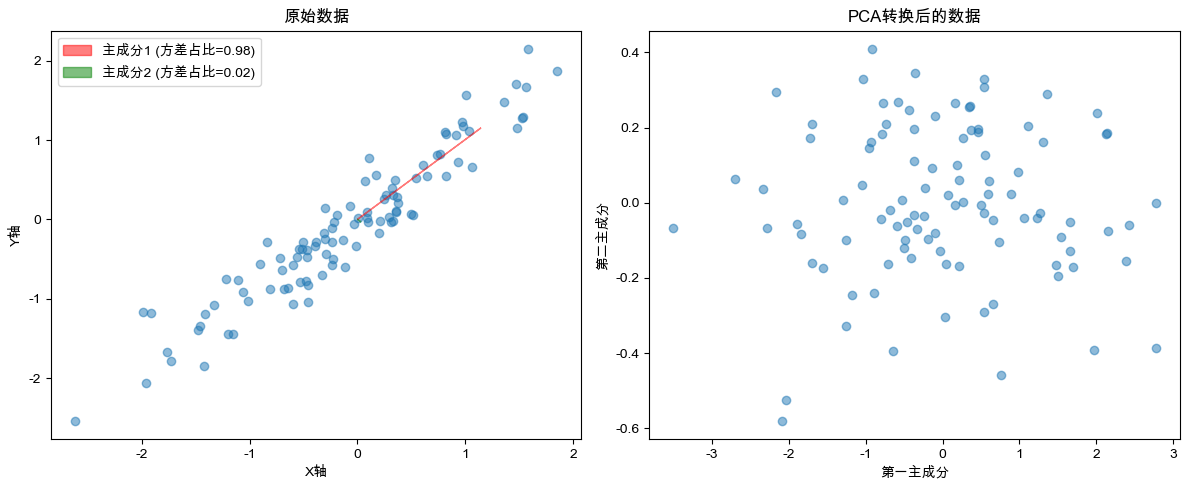

各主成分解释的方差比例: [0.97536419 0.02463581]
累计解释的方差比例: 1.0


In [39]:
from turtle import pen, shape
from matplotlib import pyplot as plt
def understand_pca():
    """理解PCA降维的简单示例"""
    # 创建示例数据
    np.random.seed(42)
    # 生成二维数据，主要分布在对角线方向
    x = np.random.normal(0, 1, 100)
    y = x + np.random.normal(0, 0.3, 100)
    data = np.column_stack((x, y))
    print(type(data))
    print("数据形状:", data.shape)
    # 创建PCA对象并拟合数据
    pca = PCA(n_components=2)
    data_transformed = pca.fit_transform(data)
    # 设置中文字体
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # macOS系统使用
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
    # 可视化原始数据和主成分
    plt.figure(figsize=(12, 5))
    
    # 原始数据散点图
    plt.subplot(121)
    plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
    plt.title('原始数据')
    plt.xlabel('X轴')
    plt.ylabel('Y轴')
    
    # 计算主成分方向
    for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
        comp_line = comp * var  # 根据方差缩放主成分向量
        plt.arrow(0, 0, comp_line[0], comp_line[1], 
                 color=['r', 'g'][i], alpha=0.5,
                 label=f'主成分{i+1} (方差占比={pca.explained_variance_ratio_[i]:.2f})')
    plt.legend()
    
    # 转换后的数据散点图
    plt.subplot(122)
    plt.scatter(data_transformed[:, 0], data_transformed[:, 1], alpha=0.5)
    plt.title('PCA转换后的数据')
    plt.xlabel('第一主成分')
    plt.ylabel('第二主成分')
    
    plt.tight_layout()
    plt.show()
    
    print("各主成分解释的方差比例:", pca.explained_variance_ratio_)
    print("累计解释的方差比例:", np.sum(pca.explained_variance_ratio_))

understand_pca()



In [ ]:
# 定义一个理解PCA的示例函数
def understand_pca(data, n_components=None):
    """
    通过示例理解PCA主成分分析
    
    参数:
    data: 输入数据矩阵
    n_components: 要保留的主成分比例，如果是0到1之间的浮点数，表示保留的主成分解释的方差比例。如果是整数，表示保留的列数量。
    
    返回:
    pca模型、转换后的数据、解释方差比例
    """
    import numpy as np
    import matplotlib.pyplot as plt
    
    # 创建PCA模型
    pca = PCA(n_components=n_components) # 保留所有主成分
    
    # 拟合数据并转换
    transformed_data = pca.fit_transform(data)
    
    # 输出原始数据和结果
    print("原始数据:\n", data)
    print("\n数据形状:", data.shape)
    
    # 输出PCA的结果
    print("\nPCA转换后的数据:\n", transformed_data)
    print("\n转换后数据形状:", transformed_data.shape)
    #输出transformed_data的方差
    print("\n转换后数据方差:", np.var(transformed_data, axis=0))
    #输出transformed_data的方差和
    print("\n转换后数据方差和:", np.var(transformed_data, axis=0).sum())
    
    # 主成分解释的方差比例
    print("\n各主成分解释的方差比例:", pca.explained_variance_ratio_)
    print("累计解释的方差比例:", np.sum(pca.explained_variance_ratio_))
    
    
    return pca, transformed_data, pca.explained_variance_ratio_

# 使用上下文中的数据
X = np.array([[2, 8, 4, 5],
              [6, 3, 0, 8],
              [5, 4, 9, 1]])

#输出X的方差
print("\n原始数据方差:", np.var(X, axis=0))
#输出X的方差和
print("\n原始数据方差和:", np.var(X, axis=0).sum())

# 调用函数演示PCA
print("完整PCA示例:")
pca_full, data_full, var_ratio_full = understand_pca(X)

# 降维到2个主成分
print("\n\n降维到2个主成分的PCA示例:")
pca_2d, data_2d, var_ratio_2d = understand_pca(X, n_components=0.9)




原始数据方差: [ 2.88888889  4.66666667 13.55555556  8.22222222]

原始数据方差和: 29.333333333333336
完整PCA示例:
原始数据:
 [[2 8 4 5]
 [6 3 0 8]
 [5 4 9 1]]

数据形状: (3, 4)

PCA转换后的数据:
 [[-3.13587302e-16  3.82970843e+00  4.59544715e-16]
 [-5.74456265e+00 -1.91485422e+00  4.59544715e-16]
 [ 5.74456265e+00 -1.91485422e+00  4.59544715e-16]]

转换后数据形状: (3, 3)

转换后数据方差: [2.20000000e+01 7.33333333e+00 9.72346137e-63]

转换后数据方差和: 29.333333333333346

各主成分解释的方差比例: [7.50000000e-01 2.50000000e-01 7.19936404e-33]
累计解释的方差比例: 1.0


降维到2个主成分的PCA示例:
原始数据:
 [[2 8 4 5]
 [6 3 0 8]
 [5 4 9 1]]

数据形状: (3, 4)

PCA转换后的数据:
 [[-3.13587302e-16  3.82970843e+00]
 [-5.74456265e+00 -1.91485422e+00]
 [ 5.74456265e+00 -1.91485422e+00]]

转换后数据形状: (3, 2)

转换后数据方差: [22.          7.33333333]

转换后数据方差和: 29.333333333333346

各主成分解释的方差比例: [0.75 0.25]
累计解释的方差比例: 1.0


: 